# EE2703 Applied Programming Lab Final Exam
25th April, 2018  
*Rajat Vadiraj Dwaraknath  
EE16B033*

# Introduction
This is the final exam. omgomgomg

In [1]:
import writefile_run

In [2]:
%%writefile_run ee16b033_final_exam.py

from pylab import *

In [3]:
%%writefile_run ee16b033_final_exam.py -a


rcParams["figure.figsize"] = 18,9
rcParams["font.size"] = 18
rcParams["text.usetex"] = True

In [4]:
%%writefile_run ee16b033_final_exam.py -a


x = linspace(0,10,101)
xx,yy = meshgrid(x,x)
dx=0.1
dy=0.1

In [5]:
%%writefile_run ee16b033_final_exam.py -a


sigma = 1e-3
s = zeros((101,101))
s[where(((xx-9)**2+(yy-9)**2<0.8**2)&((xx-9)**2+(yy-9)**2>0.4**2))] = sigma

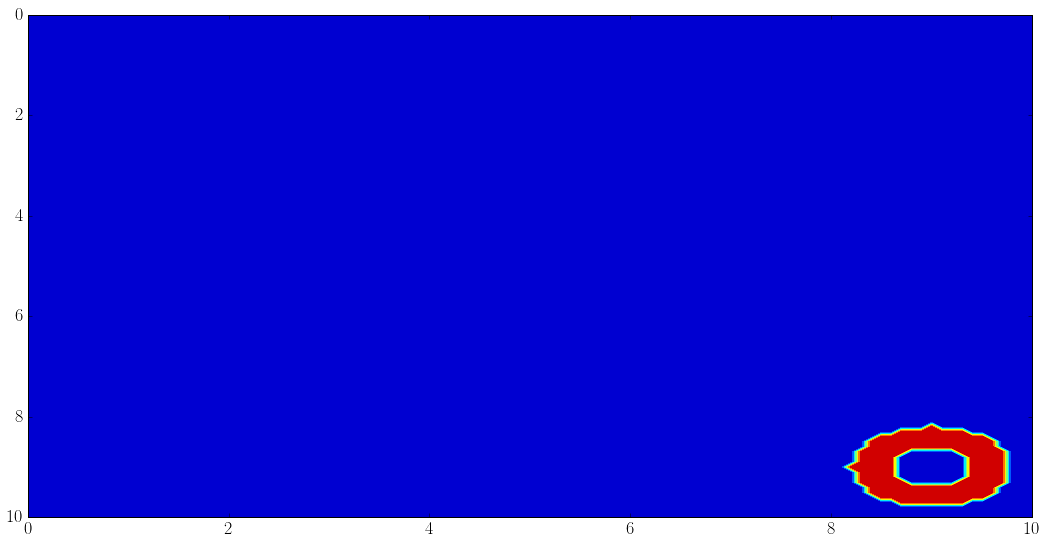

In [6]:
%%writefile_run ee16b033_final_exam.py -a


contourf(xx,yy,s)
ylim(10,0)
show()

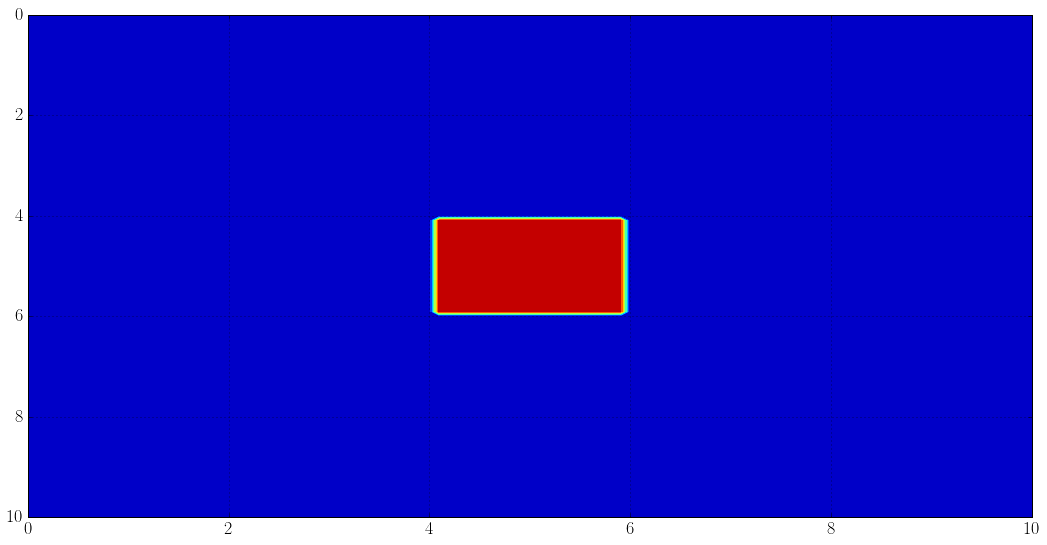

In [7]:
%%writefile_run ee16b033_final_exam.py -a

Q=300
q = zeros((101,101))
q[where((abs(xx-5)<1)&(abs(yy-5)<1))] = Q
contourf(xx,yy,q)
ylim(10,0)
grid()
show()

In [8]:
%%writefile_run ee16b033_final_exam.py -a




In [9]:
%%writefile_run ee16b033_final_exam.py -a

def iterate(T,sigarray):
    #print(np.max(sigarray))
    T[1:-1,1:-1] = (0.25*(T[1:-1,0:-2]+
                        T[1:-1,2:]+
                        T[0:-2,1:-1]+
                        T[2:,1:-1])+q[1:-1,1:-1]*dx*dy)/(1+sigarray[1:-1,1:-1]*dx*dy)
    
def bndry(T):
    T[:,0]=T[:,1]
    T[:,-1]=T[:,-2]
    T[0,:]=T[1,:]
    T[-1,:]=T[-2,:]
    #T[where(((xx-9)**2+(yy-9)**2<0.8**2)&((xx-9)**2+(yy-9)**2>0.4**2))]=0

In [10]:
%%writefile_run ee16b033_final_exam.py -a

T = zeros((101,101))
oldT = T.copy()
errors = []
N=40000
for i in arange(int(N)):
    iterate(T,s)
    bndry(T)
    T[where(T<0)]=0
    error = np.max(abs(T-oldT))
    errors.append(error)
    oldT = T.copy()

5382.86511966


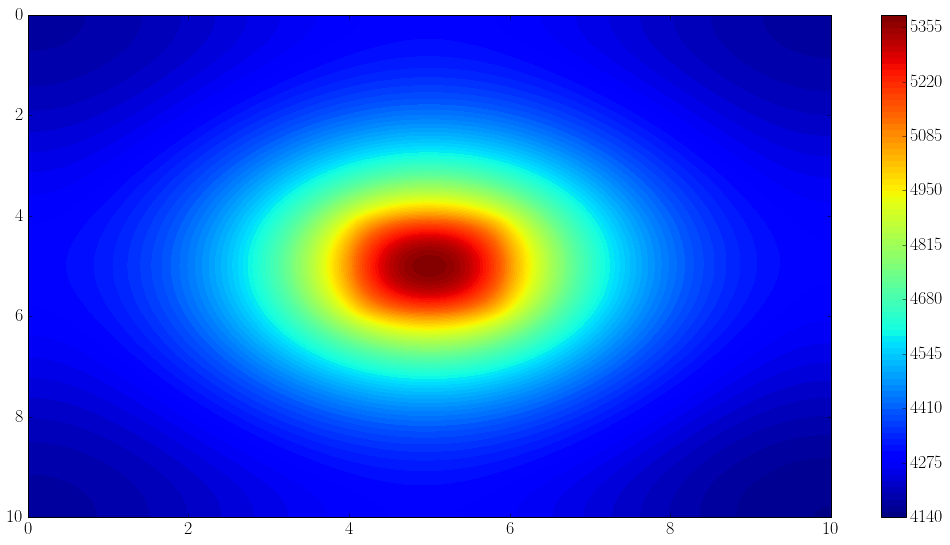

In [22]:
%%writefile_run ee16b033_final_exam.py -a


contourf(xx,yy,T,100)
colorbar()
ylim(10,0)
print(np.max(T))

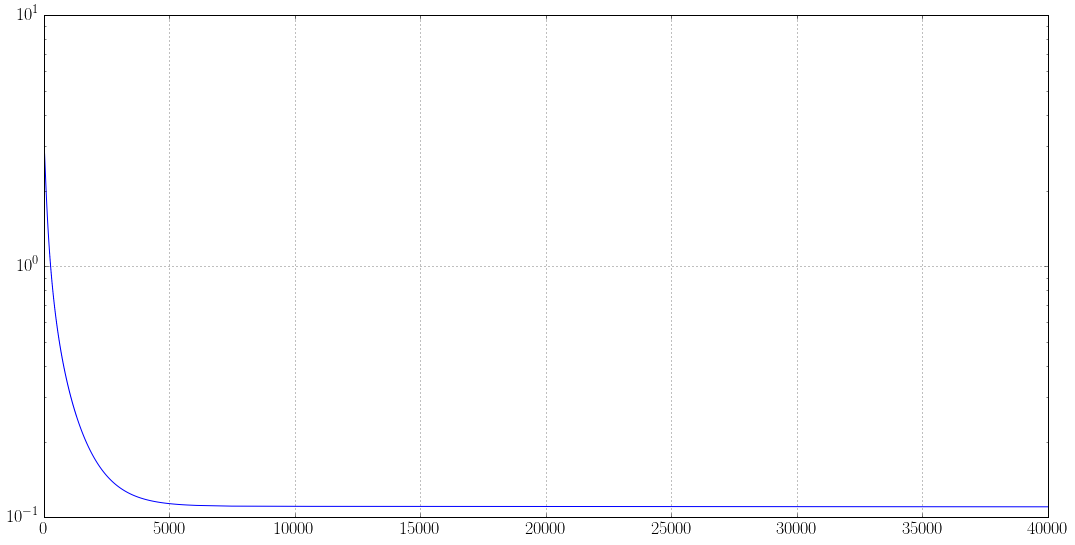

In [12]:
%%writefile_run ee16b033_final_exam.py -a

semilogy()
plot(errors)
grid()

In [13]:
%%writefile_run ee16b033_final_exam.py -a

NN=10000
x = arange(N)[NN:]
y = log(array(errors))[NN:]
A = c_[x,ones(N)[NN:]]
m,b = lstsq(A,y)[0]
print(m,b)

-1.45708137661e-07 -2.20139172392


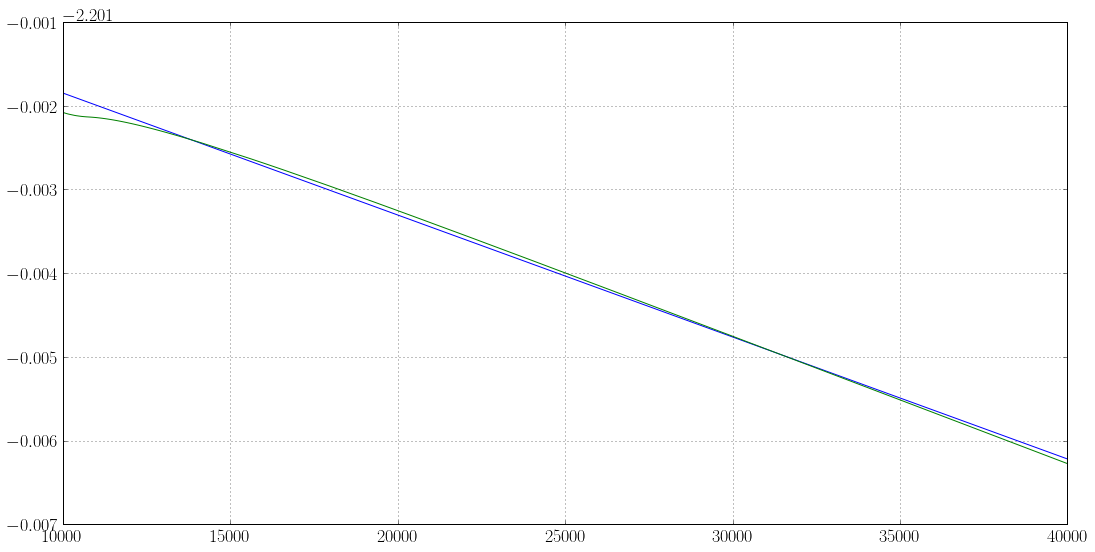

In [14]:
%%writefile_run ee16b033_final_exam.py -a


plot(x,m*x+b)
plot(x,y)
grid()

In [15]:
%%writefile_run ee16b033_final_exam.py -a


steps=(log(1e-2)-b)/m
print(steps)

16497214.9164


In [25]:
%%writefile_run ee16b033_final_exam.py -a


def solve(sig):
    sigarray = zeros((101,101))
    sigarray[where(((xx-9)**2+(yy-9)**2<0.8**2)&((xx-9)**2+(yy-9)**2>0.4**2))] = sig
    print(np.max(sigarray))
    Temp = zeros((101,101))
    oldTemp = Temp.copy()
    errors = []
    N=40000
    for i in arange(int(N)):
        iterate(Temp,sigarray)
        bndry(Temp)
        Temp[where(Temp<0)]=0
        error = np.max(abs(Temp-oldTemp))
        errors.append(error)
        oldT = Temp.copy()
    return Temp,array(errors)

In [26]:
%%writefile_run ee16b033_final_exam.py -a

minT = []
maxT = []
for sig in linspace(1e-3,1e5,25):
    Temp,errs = solve(sig)
    minT.append(np.min(Temp))
    maxT.append(np.max(Temp))
    print(sig,minT,maxT)

0.001
0.001 [4154.745740350776] [5382.865119663219]
4166.667625


KeyboardInterrupt: 

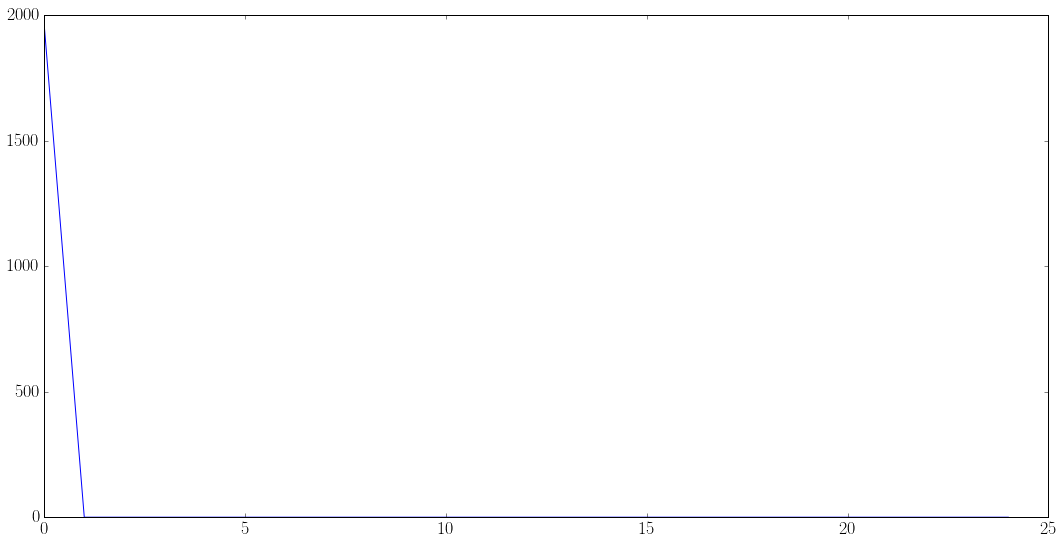

In [24]:
%%writefile_run ee16b033_final_exam.py -a


plot(minT)

In [19]:
%%writefile_run ee16b033_final_exam.py -a




In [20]:
%%writefile_run ee16b033_final_exam.py -a




In [21]:
%%writefile_run ee16b033_final_exam.py -a


